In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

 # Xopt CNSGA algorithm

In [2]:
from xopt.generators.ga.cnsga import CNSGAGenerator

from xopt.resources.test_functions.tnk import evaluate_TNK, tnk_vocs

from xopt import XoptBase, Evaluator

In [3]:
X = XoptBase(
        generator=CNSGAGenerator(tnk_vocs, n_pop=50), 
        evaluator=Evaluator(evaluate_TNK),
        vocs=tnk_vocs)

In [4]:
%%time
# Run 100 generations
for _ in range(50*100):
    X.step()

CPU times: user 6.79 s, sys: 79.1 ms, total: 6.87 s
Wall time: 7.03 s


# Plot 

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Text(0.5, 1.0, "TNK with Xopt's CNSGA")

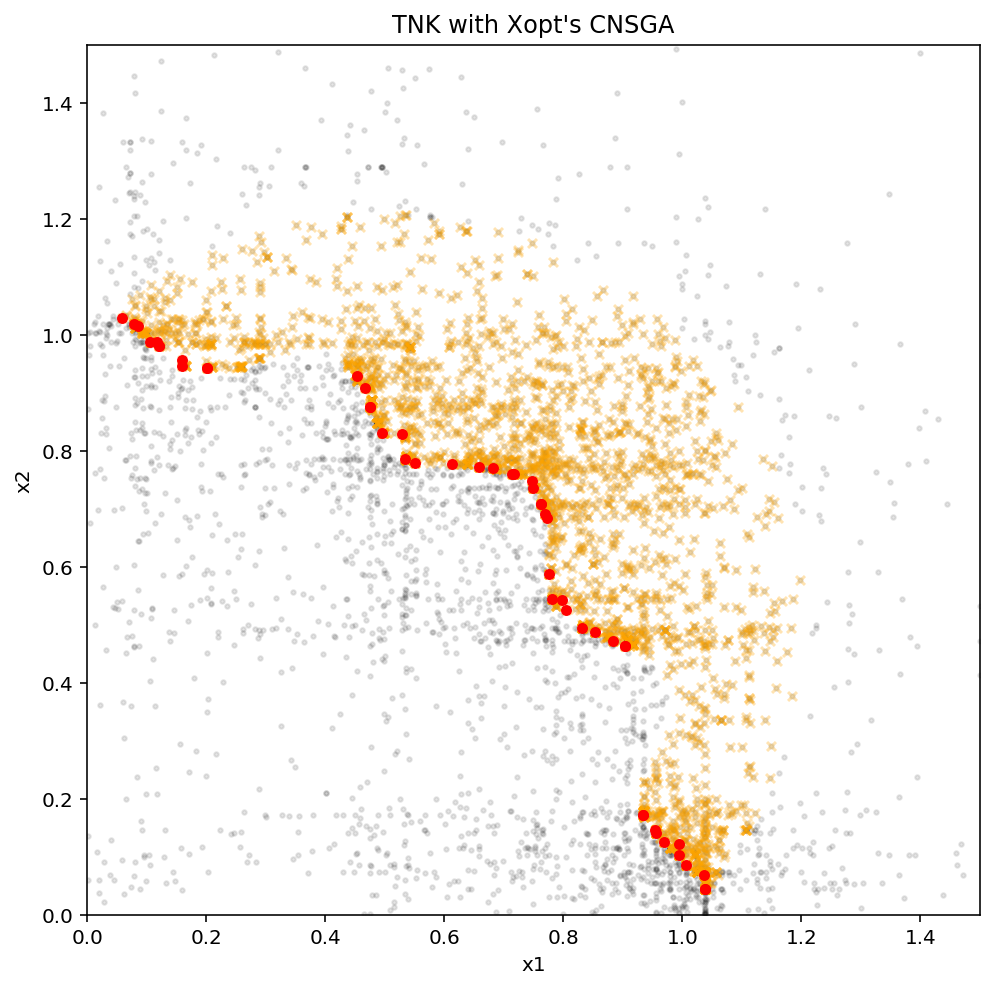

In [6]:

fig, ax = plt.subplots(figsize=(8, 8))

fdata = tnk_vocs.feasibility_data(X.data) 

k1 = 'x1'
k2 = 'x2'

X.data.plot.scatter(k1, k2, marker='.', alpha=0.1, color='black', ax=ax)
X.data[fdata['feasible']].plot.scatter(k1, k2, marker='x', alpha=0.3, color='orange', ax=ax)
X.generator.population.plot.scatter(k1, k2,  marker='o', color='red', alpha=1, ax=ax)
ax.set_xlabel(k1)
ax.set_ylabel(k2)
ax.set_xlim(0, 1.5)
ax.set_ylim(0, 1.5)
ax.set_title("TNK with Xopt's CNSGA")